In [50]:
import numpy as np
import matplotlib.pyplot as plt

In [51]:
class DataCenter:
    def __init__(self, x, y):
        self.x = x
        self.y = y

# 生成数据集
def generate_dataset(start, stop, n_samples):
    x = np.linspace(start, stop, n_samples)
    y = 2*np.sin(0.5*x) + np.random.normal(0, 0.5, n_samples)
    return DataCenter(x, y)

# 生成训练数据集
def generate_train_data(start, stop, n_samples):
    train_data = []
    for n in n_samples:
        train_data.append(generate_dataset(start, stop, n))
    return train_data

# 生成测试数据集
def generate_test_data(start, stop, n_samples):
    test_data = []
    for n in n_samples:
        test_data.append(generate_dataset(start, stop, n))
    return test_data

In [52]:
S, M, L = generate_train_data(-5, 5, [10, 30, 60])
T_S, T_M, T_L = generate_test_data(-10, 10, [20, 40, 80])

In [53]:
# 线性基函数
def linear_basis_function(x, k):
    extend_x = np.zeros((x.shape[0], k))
    for i in range(k):
        extend_x[:, i] = np.power(x, i)
    return extend_x

# 线性回归模型
def linear_regression_model(x, y, k):
    extend_x = linear_basis_function(x, k)
    w = np.linalg.inv(extend_x.T @ extend_x) @ extend_x.T @ y
    return w

# 预测
def predict(x, w):
    extend_x = linear_basis_function(x, w.shape[0])
    y_pred = extend_x @ w
    return y_pred

def rmse(y_true, y_pred):
    return np.sqrt(np.mean(np.power(y_true - y_pred, 2)))

In [54]:
def train():
    epochs = 100
    k = 4
    for i in range(epochs):
        model = linear_regression_model(S.x, S.y, k)
        y_pred = predict(T_S.x, model)
        rmse_a = rmse(T_S.y, y_pred)
        if i in [0, 1, 10, 50, 99]:
            show(model, k, rmse_a)
        
def show(model, k, rmse_a):
    sin_x = np.linspace(-10, 10, 200)
    sin_y = 2*np.sin(0.5*sin_x)
    plt.clf()
    plt.title(f'K={k} S RMSE={rmse_a}')
    plt.plot(sin_x, sin_y,label='sin_curve')
    plt.plot(S.x, S.y, 'r*', label='train_samples', markersize=5)
    plt.plot(T_S.x, T_S.y, 'go', label='test_samples', markersize=5)
    plt.plot(sin_x, predict(sin_x, model), label='MLE_curve')
    plt.xlim((-10, 10))
    plt.ylim((-5, 5))
    plt.show()
    plt.pause(1)

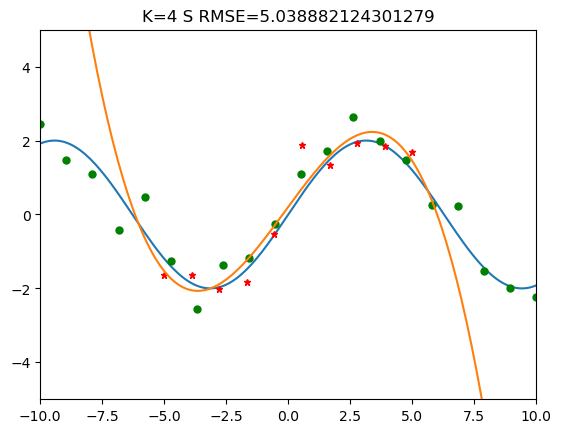

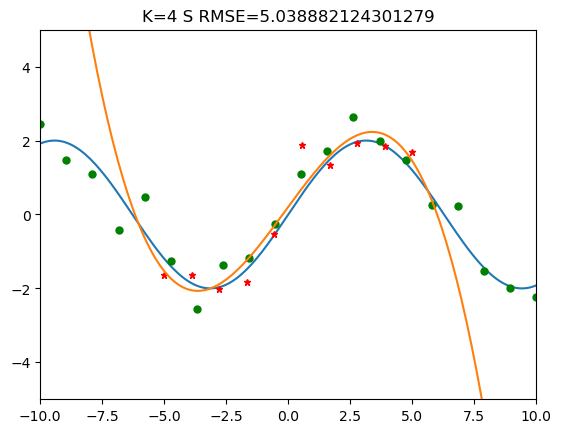

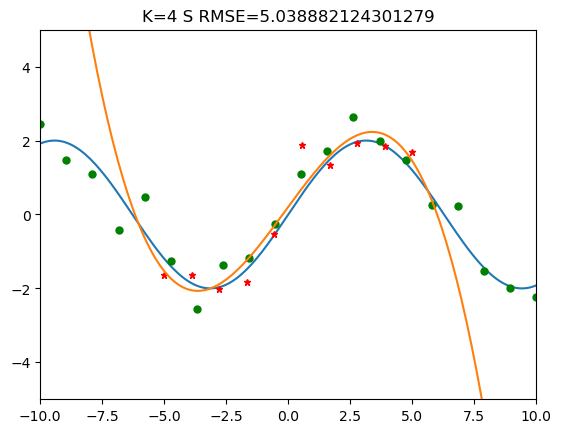

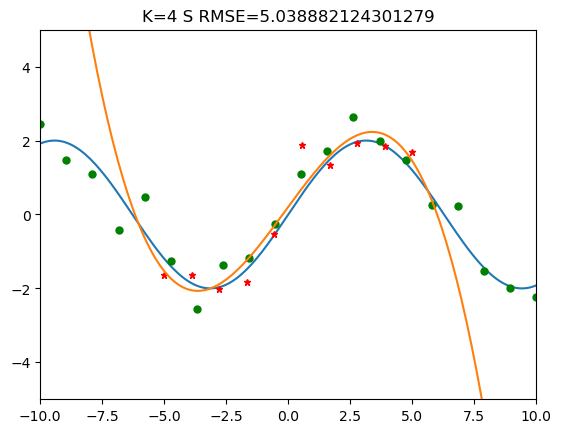

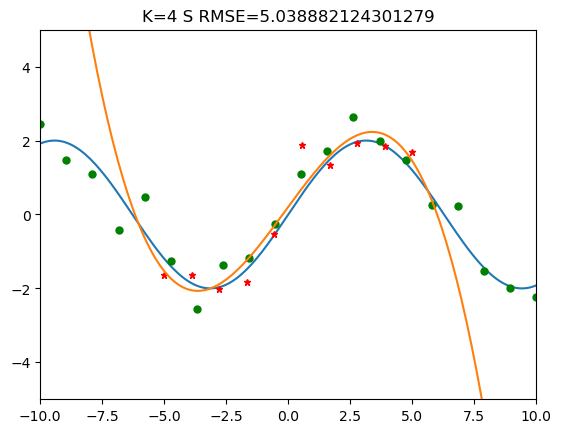

In [55]:
train()